In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix


Load dataset


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CSE_303/final project/healthcare-dataset-stroke-data.csv')

Checking datafram is successfully created

In [ ]:
#It will show frist and last 5 row of data set
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Understand dataset

In [ ]:
#It will show frist 5 row of data set
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#It will show last 15 row of data set
df.tail(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5096,41512,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.00,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.00,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.00,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.00,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.00,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.00,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [ ]:
#To print entair dataset
print(df.to_string())

         id  gender    age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0      9046    Male  67.00             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1     51676  Female  61.00             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2     31112    Male  80.00             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3     60182  Female  49.00             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4      1665  Female  79.00             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
5     56669    Male  81.00             0              0          Yes        Private          Urban        

In [ ]:
#To show only column name
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
# Identify the data types of each column
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


After checking the datatype of each colum , we can see that in this dataset catagorical or string value exisit on few  column (gender ,ever_married ,work_type ,Residence_type,smoking_status).

To implement ml model further we have to mapping catagorical value.



In [ ]:
# Count rows and coulums
print(df.shape)

(5110, 12)


In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Data Cleaning

In [ ]:
#print amount of duplicate value
print(df.duplicated().sum())

0


In [ ]:
# Find the amount of missing values in each column
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


201 missing value found on feature name : bmi

In [ ]:
# Calculating the percentage of missing values:
missing_value = df.isnull().mean()* 100
print(missing_value)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


<Axes: >

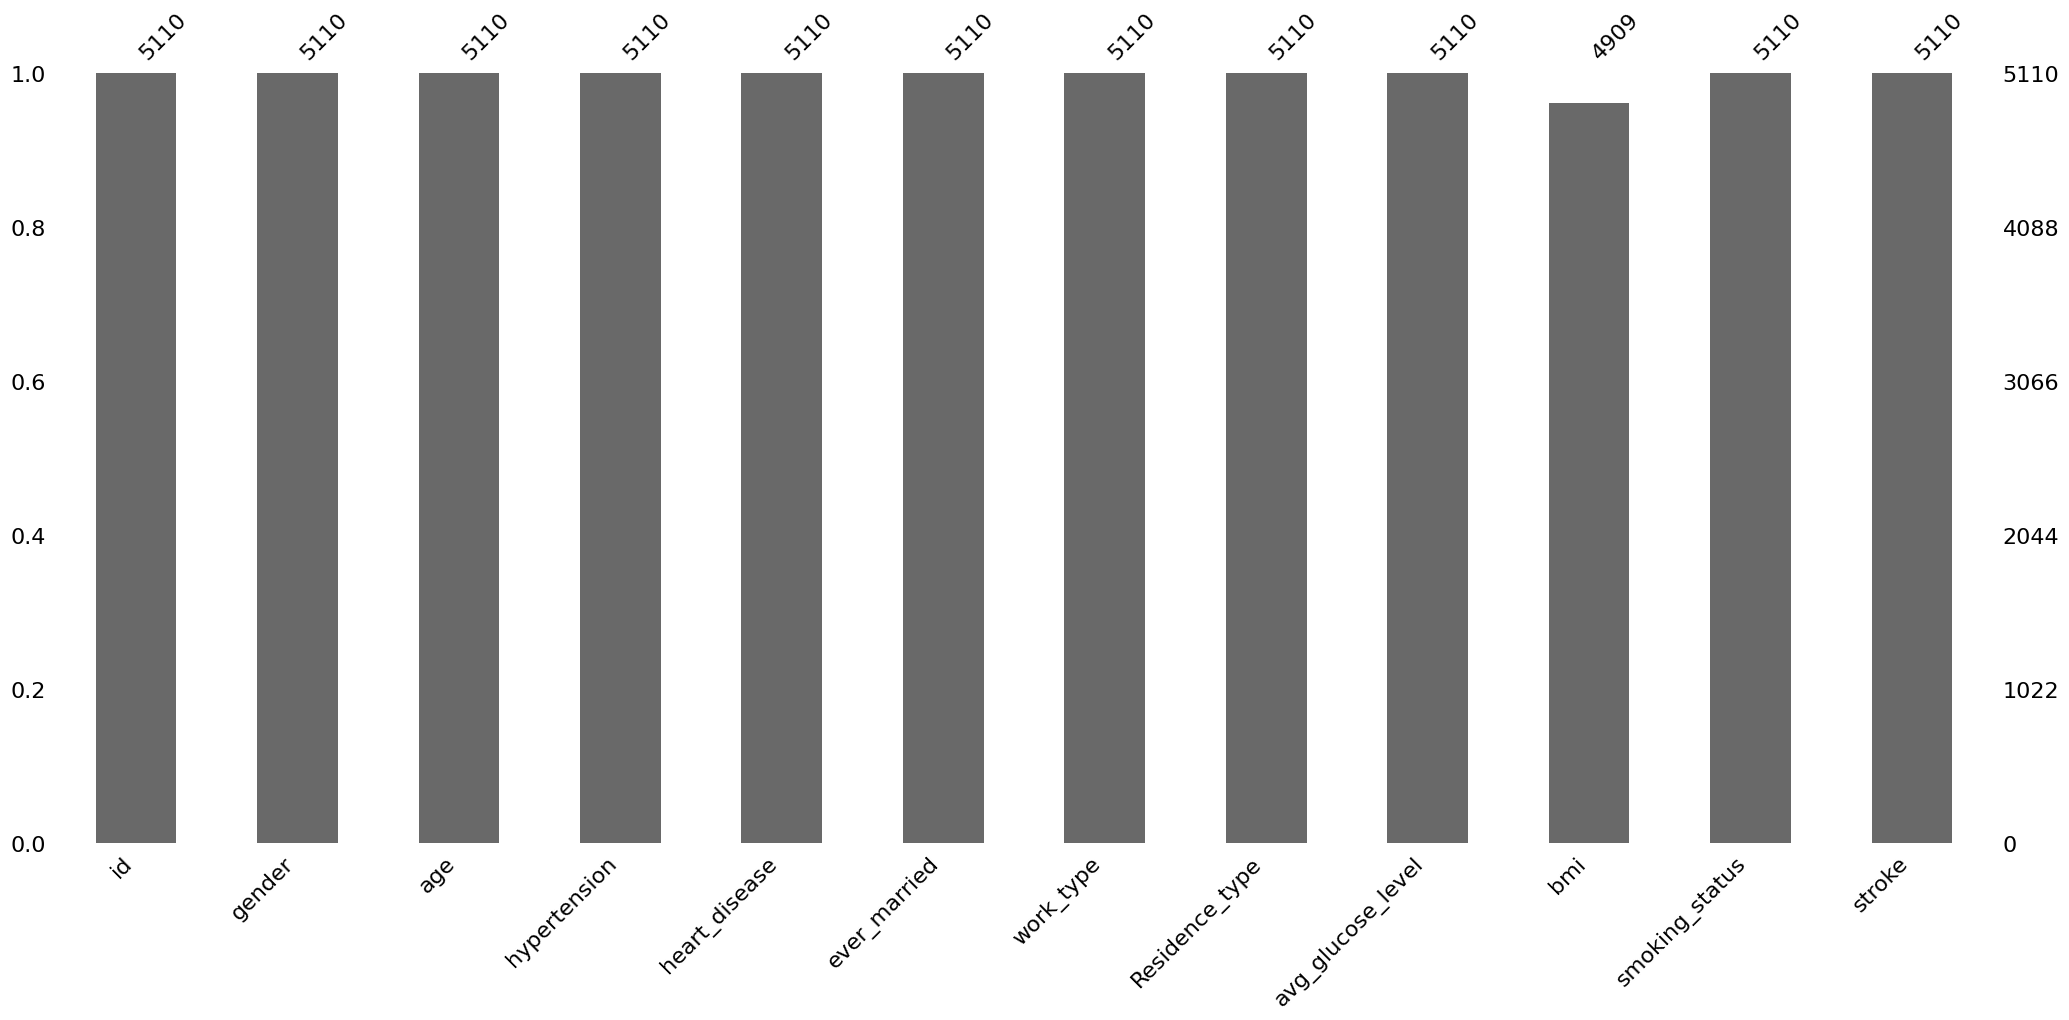

In [ ]:
# Detect missing values
# Visualisation
import missingno as msno
msno.bar(df)

From the missing value calculation and Visualization we can see that the amount of missing value is very small which is 3.93% (Minimal Missing Data (0-5%)). If we drop the those missing value it will not effect our dataset.

Therefore we take decision to drop it.

In [ ]:
df=df.dropna()

In [ ]:
#Checking is that successfully drop
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Exploratory Data Analysis (EDA)

Class No: 4700
Class Yes: 209
No: Yes 22.49 : 1


<ipython-input-273-26ceed2ddf37>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set1')


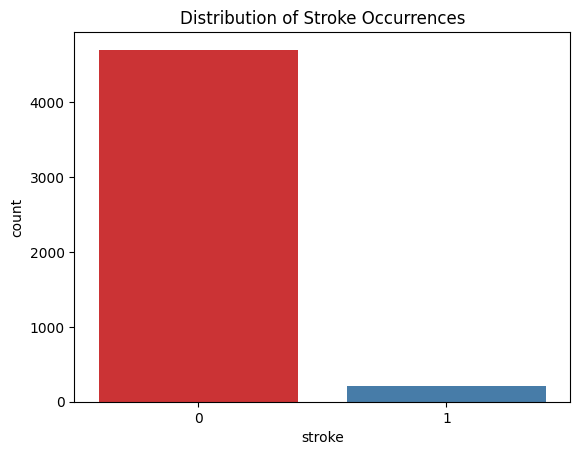

In [ ]:
target_count =df['stroke'].value_counts()
print('Class No:', target_count[0])
print('Class Yes:', target_count[1])
print('No: Yes', round(target_count[0] / target_count[1], 2), ': 1')

#Count Plot
sns.countplot(x='stroke', data=df, palette='Set1')
plt.title('Distribution of Stroke Occurrences')
plt.show()


We can see from the graph that the dataset is extremely imbalanced. We will need to use oversampling to handle this issue

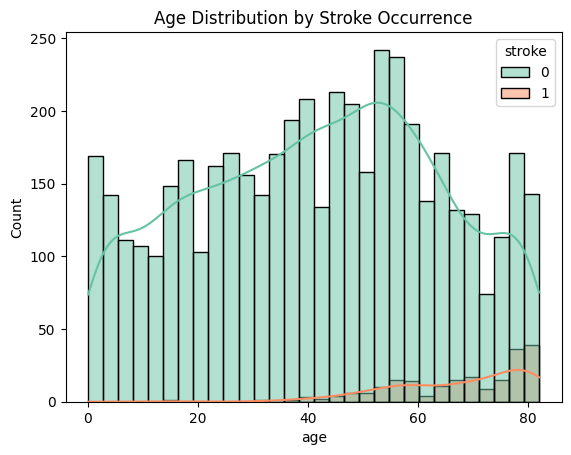

In [ ]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30, palette='Set2')
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

All the people who have suffered from strok are 40+ age. We can see from the graph that as the age increases chance of stroke increases as well

<ipython-input-275-0e4e84b90869>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='work_type', y='avg_glucose_level', data=df, palette='coolwarm')


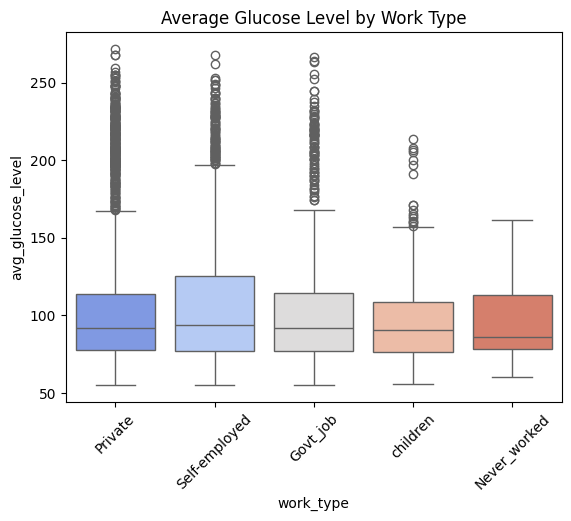

In [ ]:
sns.boxplot(x='work_type', y='avg_glucose_level', data=df, palette='coolwarm')
plt.title('Average Glucose Level by Work Type')
plt.xticks(rotation=45)
plt.show()

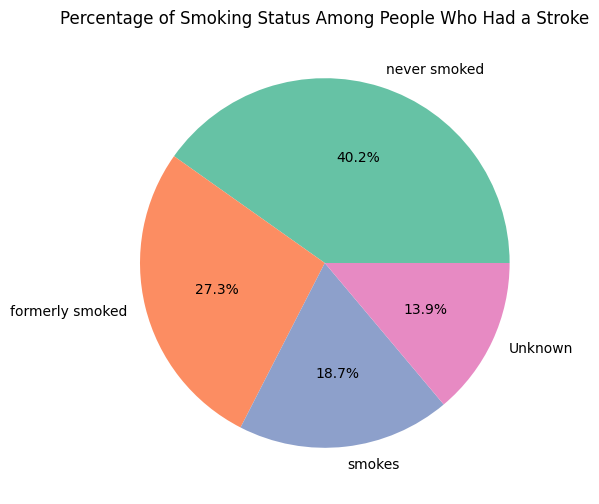

In [ ]:
stroke_df = df[df['stroke'] == 1]
stroke_counts = stroke_df['smoking_status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage of Smoking Status Among People Who Had a Stroke')
plt.show()

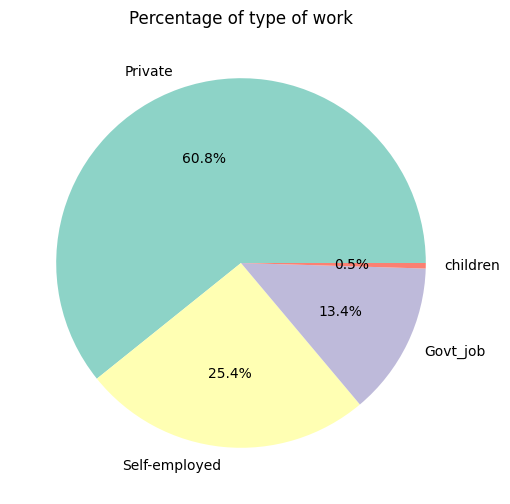

In [ ]:
stroke_df = df[df['stroke'] == 1]
stroke_counts = stroke_df['work_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Percentage of type of work')
plt.show()

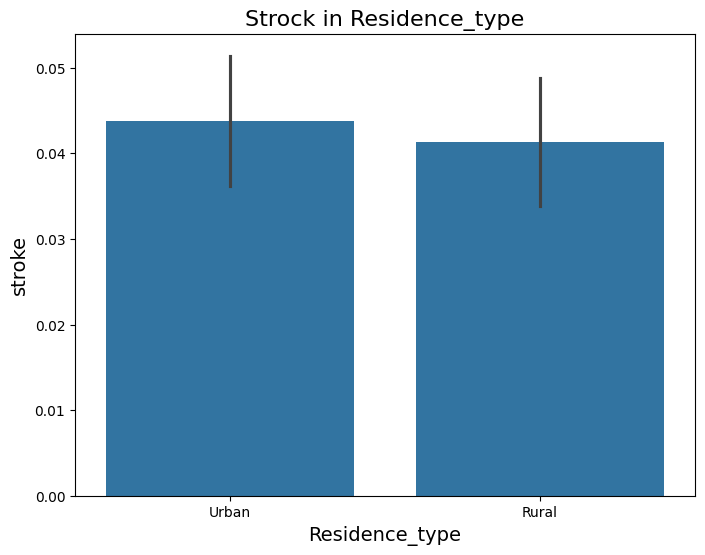

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='Residence_type', y='stroke', data=df)

# Add titles and labels
plt.title('Strock in Residence_type', fontsize=16)
plt.xlabel('Residence_type', fontsize=14)
plt.ylabel('stroke', fontsize=14)

# Show the plot
plt.show()

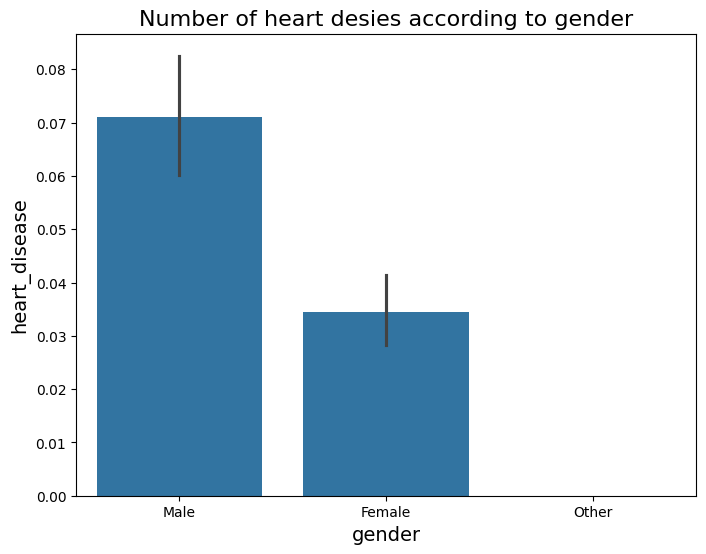

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='gender', y='heart_disease', data=df)

# Add titles and labels
plt.title('Number of heart desies according to gender', fontsize=16)
plt.xlabel('gender', fontsize=14)
plt.ylabel('heart_disease', fontsize=14)

# Show the plot
plt.show()

From this barplot we can see that male are more affected by heart disease

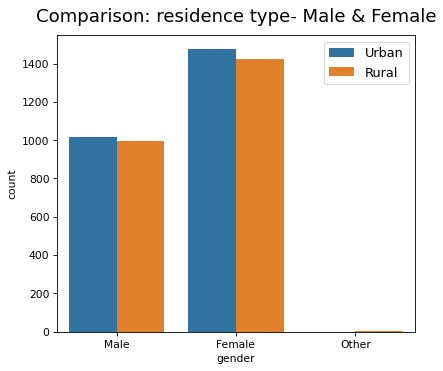

In [ ]:
plt.figure(figsize=(6,5), dpi=77)
sns.countplot(x=df['gender'],hue=df['Residence_type'])
plt.title("Comparison: residence type- Male & Female", size=17, pad= 13)
plt.legend(['Urban', 'Rural'], loc='upper right', prop={'size': 12})
plt.show()

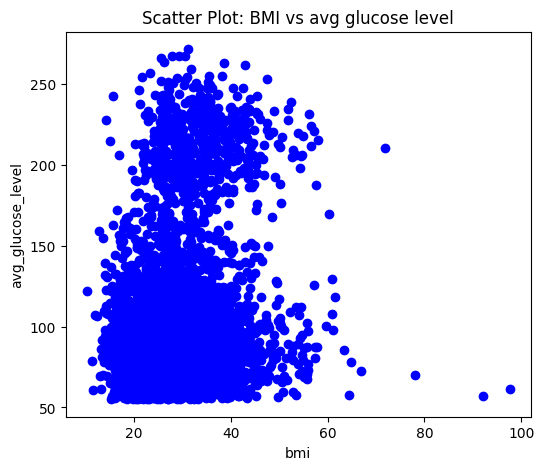

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df['bmi'], df['avg_glucose_level'], c='blue', marker='o')
plt.xlabel('bmi')
plt.ylabel('avg_glucose_level')
plt.title('Scatter Plot: BMI vs avg glucose level')
plt.show()

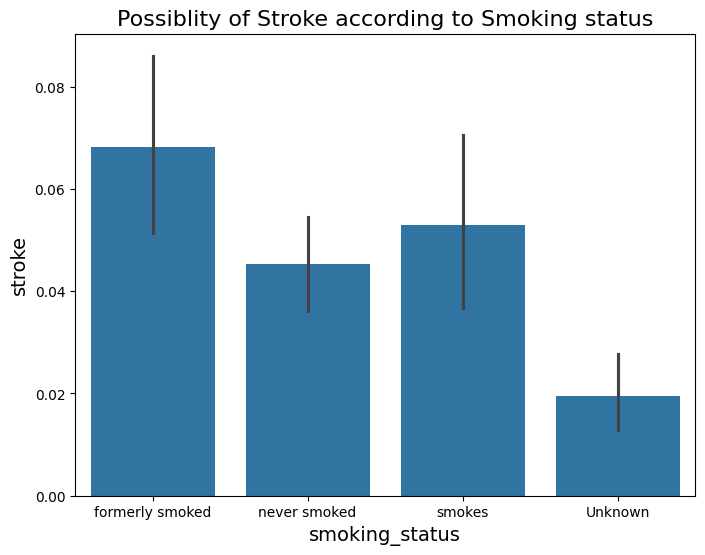

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='smoking_status', y='stroke', data=df)

# Add titles and labels
plt.title('Possiblity of Stroke according to Smoking status', fontsize=16)
plt.xlabel('smoking_status', fontsize=14)
plt.ylabel('stroke', fontsize=14)

# Show the plot
plt.show()

the higest num of stroke had been face by the people who formerly smoked.

This graph show the peole who are living city life are have strock compair to rural area people.

<ipython-input-283-8647b3d94356>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette='Set2')
<ipython-input-283-8647b3d94356>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set1')


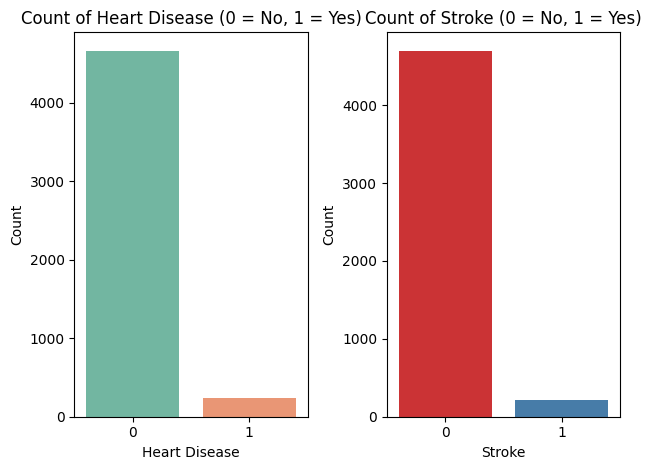

In [ ]:
# Create a subplot for heart_disease
plt.subplot(1, 2, 1)
sns.countplot(x='heart_disease', data=df, palette='Set2')
plt.title('Count of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Create a subplot for stroke
plt.subplot(1, 2, 2)
sns.countplot(x='stroke', data=df, palette='Set1')
plt.title('Count of Stroke (0 = No, 1 = Yes)')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Among people who do not have heart disease (0), most have not had a stroke.
People with heart disease (1) are more likely to have had a stroke compared to those without heart disease. This means that among individuals with heart disease, a larger portion has experienced a stroke.


So we can say that if you have heart disease there is a big chance to had a srtock.

<ipython-input-284-0f4c0d5b4bd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, palette='Set2')
<ipython-input-284-0f4c0d5b4bd0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set1')


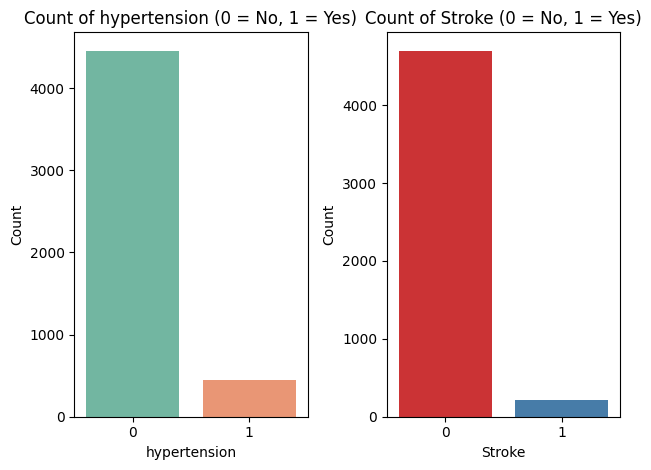

In [ ]:
# Create a subplot for heart_disease
plt.subplot(1, 2, 1)
sns.countplot(x='hypertension', data=df, palette='Set2')
plt.title('Count of hypertension (0 = No, 1 = Yes)')
plt.xlabel('hypertension')
plt.ylabel('Count')

# Create a subplot for stroke
plt.subplot(1, 2, 2)
sns.countplot(x='stroke', data=df, palette='Set1')
plt.title('Count of Stroke (0 = No, 1 = Yes)')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Among people who do not have hypertension (0), most have not had a stroke.
People with hypertension(1) are more likely to have had a stroke compared to those without hypertension. This means that among individuals with hypertension, a larger portion has experienced a stroke.


So we can say that if you have hypertension issue there is a big chance to had a srtock.

In [ ]:
#before mapping data frame
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Mapping (or encoding) categorical data

As logistic regression requires numerical input to perform calculations therfor here we do mapping (or encoding) categorical data before running a logistic regression model

In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
mapping1 = {'Male': 0, 'Female': 1, 'Other':2}
df['gender'] = df['gender'].map(mapping1)

<ipython-input-287-0c88f996c0e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map(mapping1)


In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
mapping2 = {'Yes': 0, 'No': 1}
df['ever_married'] = df['ever_married'].map(mapping2)

<ipython-input-289-ce888daaa09e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = df['ever_married'].map(mapping2)


In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
mapping3 = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
df['work_type'] = df['work_type'].map(mapping3)

<ipython-input-291-76154e1c124f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type'] = df['work_type'].map(mapping3)


In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
mapping4 = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(mapping4)

<ipython-input-293-84fa3fdd0428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type'] = df['Residence_type'].map(mapping4)


In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
mapping6 = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}
df['smoking_status'] = df['smoking_status'].map(mapping6)

<ipython-input-295-e6e37243d647>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map(mapping6)


In [ ]:
#aftermapping dataframe look like
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,56669,0,81.0,0,0,0,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,1,3,1,103.08,18.6,3,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,37544,0,51.0,0,0,0,0,1,166.29,25.6,0,0


In [ ]:
#Sastistical view of dataset
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,0.590548,42.865374,0.091872,0.049501,0.347321,0.842534,0.492768,105.305150,28.893237,1.583826,0.042575
std,20995.098457,0.492197,22.555115,0.288875,0.216934,0.476167,1.124057,0.499999,44.424341,7.854067,1.090146,0.201917
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,18605.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.070000,23.500000,1.000000,0.000000
50%,37608.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.680000,28.100000,1.000000,0.000000
75%,55220.000000,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.570000,33.100000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


Heat map

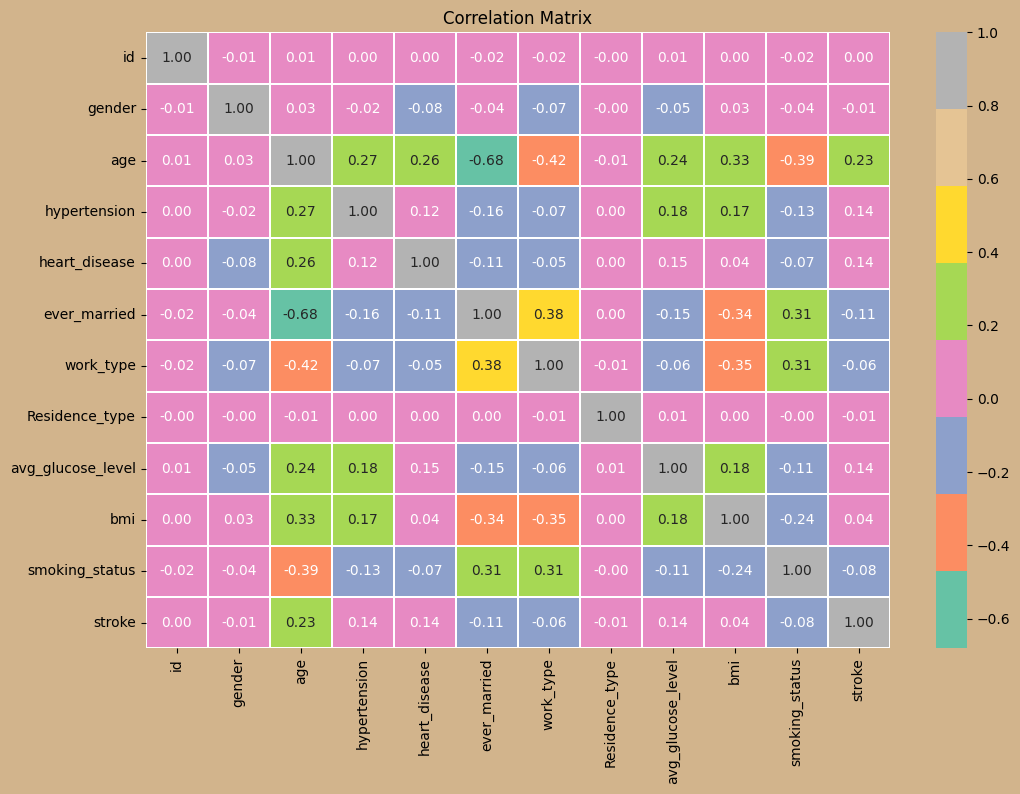

In [ ]:
## Visualisation of the corralation table
correlations = df.corr()

plt.figure(figsize=(12,8),facecolor='tan')

sns.heatmap(correlations, linecolor='white',linewidths=0.1, annot=True,fmt='.2f',cmap='Set2')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

we can see from the correlation matrix none of the featurs have strong correlation with the target column 'stroke'. The feature that has the highest correlation with target column is 'age' , only 0.23. Even among themselves features don't have a strong correlation. The highest correlation between them is between 'age' and 'ever_married' which is -0.68.

Impelement logistic regression model

As  logistic regression work batter for small dataset , also it provide batter result for binary classification problem .Therefore we choose this model.

In [ ]:
#feature selection
x = df.drop(['id', 'stroke'], axis=1)
#target varriable
y = df['stroke']

In [ ]:
#to check is strock successfully droped
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0
2,0,80.0,0,1,0,0,1,105.92,32.5,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2
4,1,79.0,1,0,0,1,1,174.12,24.0,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,1,3,1,103.08,18.6,3
5106,1,81.0,0,0,0,1,0,125.20,40.0,1
5107,1,35.0,0,0,0,1,1,82.99,30.6,1
5108,0,51.0,0,0,0,0,1,166.29,25.6,0


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
# Train the model
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = log_reg.predict(x_test)

Model Evulating


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9460285132382892
Precision: 0.0
Recall (Sensitivity): 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


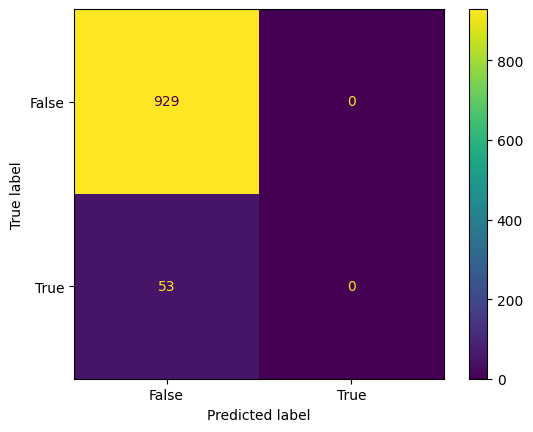

In [ ]:
# Compute the confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

We can see that since the dataset was imbalanced it couldn't identify the minority class properly. It couldn't identify any of the datapoints of true class, all 53 datapoints are misclassified. Among all 984 datapoints in target set only 1 time the model predicted the datapoint as 'True' class.

Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler


random = RandomOverSampler(random_state=42)
x_rand, y_rand = random.fit_resample(x_train, y_train)

In [ ]:
# Initialize the Logistic Regression model
log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(x_rand, y_rand)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred2 = log_reg3.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

# Calculate precision
precision2 = precision_score(y_test, y_pred3)
print("Precision:", precision2)

# Calculate recall (sensitivity)
recall2 = recall_score(y_test, y_pred3)
print("Recall (Sensitivity):", recall3)

# Calculate F1-score
f1_score2 = f1_score(y_test, y_pred3)
print("F1-Score:", f1_score3)

Accuracy: 0.754582484725051
Precision: 0.16428571428571428
Recall (Sensitivity): 0.8679245283018868
F1-Score: 0.27627627627627627


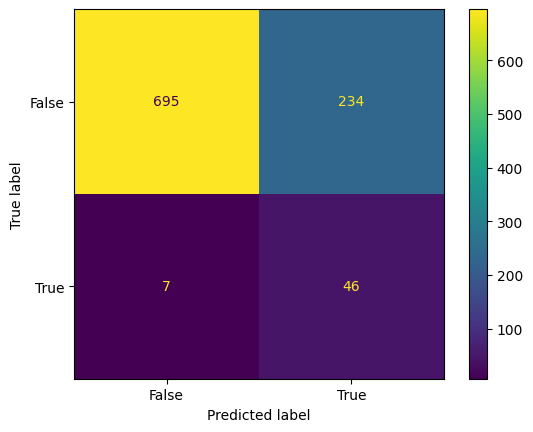

In [ ]:
# Compute the confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Comparison between all models

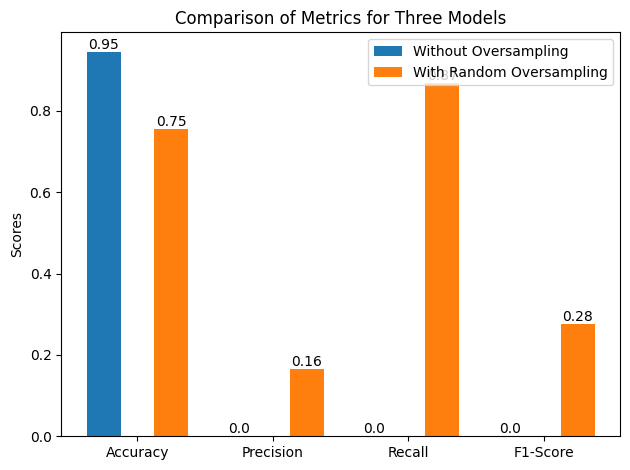

In [ ]:
metrics1 = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

metrics2 = {
    'Accuracy': accuracy2,
    'Precision': precision2,
    'Recall': recall2,
    'F1-Score': f1_score2
}


# Prepare data for plotting
labels = list(metrics1.keys())
model1_values = list(metrics1.values())
model2_values = list(metrics2.values())


x = np.arange(len(labels))
width = 0.25

# Create the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, model1_values, width, label='Without Oversampling')
bars2 = ax.bar(x + width, model3_values, width, label='With Random Oversampling')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Three Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


The main reason behind poor performance of the model is the imbalanced dataset. The number of datapoints for minority class is way too low compared to majority class. So the model couldn't learn about minority class at all. After oversampling the model has learned how to identify minority class as well but it has a negative effect. And started to misclassify a lot of positive classes as well